In [46]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [47]:
application_record = pd.read_csv('data/application_record_cleaned.csv')
credit_record = pd.read_csv('data/credit_record_cleaned.csv')

In [48]:
merged_data = application_record.merge(credit_record, on='ID', how='inner')

In [49]:
print(merged_data.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYMENT_YEARS',
       'STATUS'],
      dtype='object')


In [50]:
print(merged_data)

            ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804           M            Y               Y           0.0   
1      5008805           M            Y               Y           0.0   
2      5008806           M            Y               Y           0.0   
3      5008808           F            N               Y           0.0   
4      5008809           F            N               Y           0.0   
...        ...         ...          ...             ...           ...   
36452  5150482           F            Y               Y           1.0   
36453  5150483           F            Y               Y           1.0   
36454  5150484           F            Y               Y           1.0   
36455  5150485           F            Y               Y           1.0   
36456  5150487           M            Y               N           0.0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              0.059697               Worki

In [51]:
merged_data.shape

(36457, 20)

In [52]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,EMPLOYMENT_YEARS,STATUS
0,5008804,M,Y,Y,0.0,0.059697,Working,Higher education,Civil marriage,Rented apartment,12005.0,4542.0,1.0,0.0,0.0,Laborers,2.0,32.890411,12.443836,0
1,5008805,M,Y,Y,0.0,0.059697,Working,Higher education,Civil marriage,Rented apartment,12005.0,4542.0,1.0,0.0,0.0,Laborers,2.0,32.890411,12.443836,0
2,5008806,M,Y,Y,0.0,0.012850,Working,Secondary / secondary special,Married,House / apartment,21474.0,1134.0,0.0,0.0,0.0,Security staff,2.0,58.832877,3.106849,0
3,5008808,F,N,Y,0.0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110.0,3051.0,0.0,1.0,1.0,Sales staff,1.0,52.356164,8.358904,0
4,5008809,F,N,Y,0.0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110.0,3051.0,0.0,1.0,1.0,Sales staff,1.0,52.356164,8.358904,0


In [53]:
merged_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
EMPLOYMENT_YEARS       0
STATUS                 0
dtype: int64

In [54]:
unique_counts = merged_data.nunique()
print(unique_counts)

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
AGE                     7183
EMPLOYMENT_YEARS        3636
STATUS                     2
dtype: int64


In [55]:
def print_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("Categorical columns:", categorical_columns.tolist())

print_categorical_columns(merged_data)

Categorical columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [56]:
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR',
                     'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                     'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                     'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = le  


In [57]:
def print_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    print("Numeric columns:", numeric_columns.tolist())

print_numeric_columns(merged_data)

Numeric columns: ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYMENT_YEARS', 'STATUS']


In [58]:
merged_data = merged_data.drop(columns=['DAYS_BIRTH'], errors='ignore')
merged_data = merged_data.drop(columns=['DAYS_EMPLOYED'], errors='ignore')

In [59]:
print(merged_data.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE',
       'EMPLOYMENT_YEARS', 'STATUS'],
      dtype='object')


In [60]:
numerical_columns = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYMENT_YEARS']

scaler = StandardScaler()
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

Class Distribution:
STATUS
0    18805
1    17652
Name: count, dtype: int64


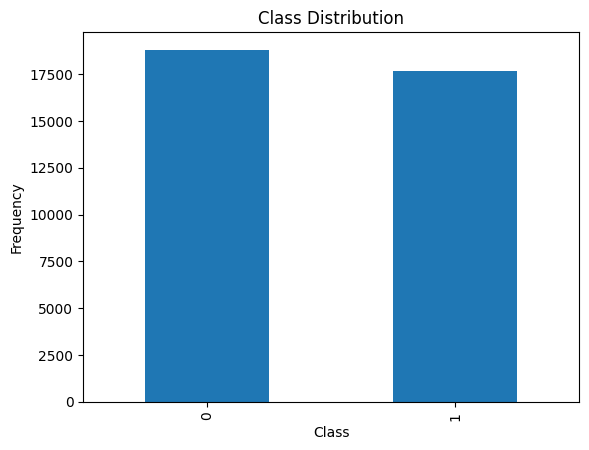

In [61]:
import matplotlib.pyplot as plt

class_distribution = merged_data['STATUS'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Visualize the class distribution
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

In [62]:
print(merged_data.info())
print(merged_data.head())

merged_data.to_csv('data/cleaned_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  float64
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  float64
 11  FLAG_PHONE           36457 non-null  float64
 12  FLAG_EMAIL           36457 non-null  float64
 13  OCCUPATION_TYPE      36457 non-null  int64  
 14  CNT_FAM_MEMBERS      36457 non-null  float64
 15  AGE                  36457 non-null 